In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# COVID-19 Growth Patterns in Critical Countries

This notebook is intended to serve as an EDA for the current Kaggle competion on global forecasting of the spread of the coronvirus.

I think it is important for everyone to understand the nature of the growth patterns of pandemics. There is an excellent Youtube video from [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) that offers a great explanation.

### Understanding Growth Video Link

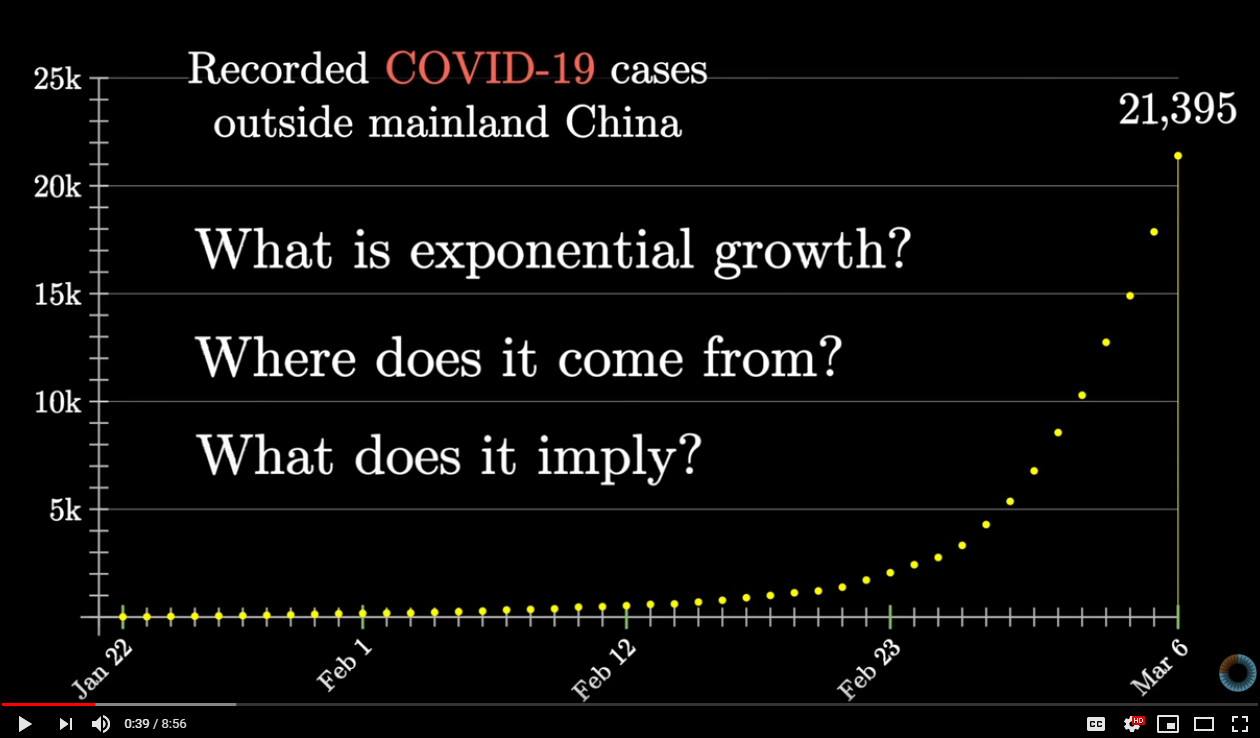

https://www.youtube.com/watch?v=Kas0tIxDvrg&t=35s

In [ ]:
#import IPython
#IPython.display.IFrame(<iframe width="650" height="400" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" title="2019-nCoV" src="/gisanddata.maps.arcgis.com/apps/Embed/index.html?webmap=14aa9e5660cf42b5b4b546dec6ceec7c&extent=77.3846,11.535,163.5174,52.8632&zoom=true&previewImage=false&scale=true&disable_scroll=true&theme=light"></iframe>)

In [ ]:
from IPython.display import HTML

HTML('<div style="position:relative;height:0;padding-bottom:56.25%"><iframe src="https://www.youtube.com/embed/jmHbS8z57yI?ecver=2" width="640" height="360" frameborder="0" style="position:absolute;width:100%;height:100%;left:0" allowfullscreen></iframe></div>')

# Purpose of This Document
The purpose of this notebook is to provide tracking of the COVID-19 virus in specific countries and regions that have seen severe growth rates. Currently, the following countries and regions are included:
* China
* All China excluding the original Hubei province
* Rest of the world
* United States
* Italy
* Iran
* Spain
* More (see below in the Change History section)

There are two phases to the growth rate, an exponential phase, and then a flattening, downward turning of the curve. This is a sigmoid curve. The sigmoid curve is include only in the cases where the inflection point has been crossed (as of 3/15/20, all China and remainder of China excluding Hubei. 

Because I live in the United States, The report now includes US states which have very active growth rates.

Overall, it is hopeful that the exponential graphs will help us define the inflection point for each separate population grouping. 

## Observation Log

* On 3/18, South Korea was moved to the sigmoid tracking group. The sigmoid curves now converge.
*          Italy's exponential curve began to tilt slightly. That may signal the start of an inflection point.
*          Italy's mortality rate is extremely high and still climbing.
*          Washington State also seems to be flattening.
* 3/20/20 - For the third day in a row, the confirmed rate in Iran is to the right of the curve. **Iran may be reaching an inflection** point after around 25 days. **Italy also seems close** to an inflection point
* 3/23/20 - Most of the European countries seem to be flattening on the exponential growth curve. However, South Korea now seems to have a spike in new cases. Iran now has curve fitting available for the logistic curve.
* 3/27/20 - All the European country growth curves are flattening. This means we are reaching an inflection point at around day 32. Italy still does not fit a logistic curve. The exponential growth curve for both South Korea and Iran has started to turn up again, indicating that there are new cases showing up after the inflection point. The inflection point may be further out than we thought. Both Iran and South Korea has an increase in exponential growth rate, reversing the logistic curve. Did they stop their containment program too soon? While not on these graphs, Los Angeles now has over 1100 cases. It seems to be another very hot area. The new cases daily tracking show some disturbing information that **Iran's rate is still growing exponentially, a reversal over the last few days.** Iran has been removed from the logistic plots.
* 3/28/20 - The good news is that the daily number of new cases turned down in the US and almost every state. On the other hand, Iran has had an uptick in new cases, and has been removed from the logistic plots.
* 3/30/20 - The daily number of new cases is turning down in European countries and nearly all US states. Colorado and Illinois still are showing increases. Switzerland is at or past an inflection point. Iran now shows a continuing upward growth pattern. Either there is more testing or a relaxed social distance policy. That country should be carefully watched for the next 2 weeks. Sweden has the lowest growth rate in Europe at 11%.
* 3/31/20 - As of 3/30, Italy, Spain, Hot European, and New York all now have logistic curve form and are being plotted. In New York, the k parameter is 16, which might indicate a false positive. The inflection point in Europe seems to be around 33 days. 
* 4/2/20  - Most states in the US are beginning to reach inflection. Washington now fits a logistic curve.
* 4/5/20  - All US states except Michigan seemed to have reached inflection point. European countres UK and France are still showing exponential growth. Iran has reached another inflection point. Once we are able to plot the logistic curve, we can see where the inflection points are. The European points seem to be further out, between 33 and 40 days. The points for the two US states, New York and Washington are around 24 days. This will push out a bit further probably, because growth is almost linear in the US states. 
* 4/6/20 - Louisiana, Massachusetts, Florida, and the rest of the world without China all seemed to have reached an inflection point. They are being moved to the logistic tracking graph.

## Change History

* 2020-03-18 - Addressed a problem with some of the curve fitting not converging. Because some of the countries, like the US, had a long period of days with no increases of cases, the tracking start date.
* 2020-03-18 - Added US "hot" states, NY, CA, and WA. Also added Germany, which has shown rapid recent growth.
* 2020-03-19 - Added Colorado, per friend request. Also added France and 2 high density countries, Monaco and Singapore
* 2020-03-20 - Removed Monaco, not enough cases
* 2020-03-21 - Added Switzerland, New Jersey, Louisiana, and 12 'hot' European countries as a group
* 2020-03-22 - Added United Kingdom and UK to hot European group
* 2020-03-23 - Changed South Korea extract, due to a data change in source; moved Iran to the logistic curve section;
* 2020-03-24 - Changed dataset source due to issues with corona-virus-report/covid_19_clean_complete.csv; United Kingdom is called UK on this dataset
* 2020-03-27 - Added more US states: Massachusetts, Florida, Michigan, Illinois. Add new cases tracking graph. Removed Iran from logistic graph. 
* 2020-03-30 - Added Sweden to country tracking because they are not enforcing any social distancing rules. Also added India because of population size.
* 2020-03-31 - Moved Italy, Spain, Hot European, and New York to the logistic plot.
* 2020-04-02 - Added Washington to logistic plot. Corrected error with negative growth rates.
* 2020-04-05 - Added Germany, California, Washington to logistic plot. Corrected error with negative growth rates.
* 2020-04-06 - Added Louisiana, Massachusetts, Florida, and the rest of the world without China to logistic plots.
* 2020-04-08 - Added United States to logistic plots.
*   -- planned -- extract all growth rates into a separate table for comparison; add additional hot countries


## About Coronavirus

* Coronaviruses are **zoonotic** viruses (means transmitted between animals and people).  
* Symptoms include from fever, cough, respiratory symptoms, and breathing difficulties. 
* In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death.
* Coronaviruses are also asymptomatic, means a person can be a carrier for the infection but experiences no symptoms

## Novel coronavirus (nCoV)
* A **novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.

## COVID-19 (Corona Virus Disease 2019)
* Caused by a **SARS-COV-2** corona virus.  
* First identified in **Wuhan, Hubei, China**. Earliest reported symptoms reported in **November 2019**. 
* First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals. 
* On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern 

# Acknowledgements

This effort was inspired by an excellent Youtube video from [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

* Video - https://www.youtube.com/watch?v=Kas0tIxDvrg&t=35s 
* Starting kernel - https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
* https://github.com/CSSEGISandData/COVID-19
* https://arxiv.org/ftp/arxiv/papers/2003/2003.05681.pdf



# Libraries

### Install

In [ ]:
## install calmap
#! pip install calmap

### Import Libraries

In [ ]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import calmap
import folium
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

# Dataset

In [ ]:
# importing datasets


full_table = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv',parse_dates = ['ObservationDate'])
#full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', parse_dates=['Date'])
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')


In [ ]:
full_table.tail()

In [ ]:
xx = full_table[full_table['Country/Region']=='South Africa'].head(20)

## Most Recent Update

In [ ]:
print ('Last update of this dataset was ' + str(full_table.loc[len(full_table)-1]['Last Update']))
#print ('Last update of this dataset was ' + str(full_table.loc[len(full_table)-1]['Date']))

In [ ]:
full_table.columns = ['SNo', 'Date', 'Province/State', 'Country/Region','Last Update', 'Confirmed', 'Deaths', 'Recovered']

# Preprocessing

In [ ]:
### Cleaning Data

# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

In [ ]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Cruise Ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
us = full_table[full_table['Country/Region']=='US']
skorea  = full_table[full_table['Country/Region']=='South Korea']
hot_europe = full_table[full_table['Country/Region'].isin(
    ['Italy,Spain','Germany','France','UK','Switzerland','Netherlands','Belgium','Austria','Norway','Sweden','Denmark','Portugal', 'Great Britain']) ]
italy = full_table[full_table['Country/Region']=='Italy']
iran = full_table[full_table['Country/Region']=='Iran']
spain = full_table[full_table['Country/Region']=='Spain']
france = full_table[full_table['Country/Region']=='France']
uk = full_table[full_table['Country/Region']=='UK']
switzerland = full_table[full_table['Country/Region']=='Switzerland']
singapore = full_table[full_table['Country/Region']=='Singapore']
sweden = full_table[full_table['Country/Region']=='Sweden']
india = full_table[full_table['Country/Region']=='India']
japan = full_table[full_table['Country/Region']=='Japan']
row = full_table[full_table['Country/Region']!='China']
#rest of China
roc = china[china['Province/State'] != 'Hubei']
germany = full_table[full_table['Country/Region']=='Germany']
ca = us[us['Province/State'] == 'California']
ny = us[us['Province/State'] == 'New York']
wa = us[us['Province/State'] == 'Washington']
co = us[us['Province/State'] == 'Colorado']
nj = us[us['Province/State'] == 'New Jersey']
la = us[us['Province/State'] == 'Louisiana']
ma = us[us['Province/State'] == 'Massachusetts']
fl = us[us['Province/State'] == 'Florida']
mi = us[us['Province/State'] == 'Michigan']
il = us[us['Province/State'] == 'Illinois']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [ ]:
def country_info (country, dt, incl_state=False):
    
    if incl_state:
        print ('Rates for states/province in ' + pd.unique(country['Country/Region']))
        by_state = country.groupby(['Date', 'Province/State'])['Date','Confirmed', 'Deaths', 'Recovered', 'Active'].max()
        by_state.active = by_state
        by_state = by_state.sort_values(by='Confirmed', ascending=False)
        by_state.reset_index(drop=True)
        by_state.style.background_gradient(cmap='Pastel1_r')
        print (by_state)
    by_date = country.groupby (['Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
    by_date = by_date.reset_index()
    by_date = by_date[by_date.Date>=dt]
    #print (len(by_date))

    #print ('Rates for country/region : ' + pd.unique(country['Country/Region']))

    #print (by_date)
    
    
    # Add need fields
    
    by_date ['prior_confirmed'] = 0
    by_date ['prior_deaths'] = 0
    by_date ['prior_recovered'] = 0
    by_date ['daily_confirmed'] = 0
    by_date ['daily_deaths'] = 0
    by_date ['daily_recovered'] = 0
    p_confirmed = 0
    p_deaths = 0
    p_recovered = 0
   
    for i, row in by_date.iterrows():
        #print (by_date.loc[i])
        by_date.loc[i,'prior_confirmed'] = p_confirmed 
        by_date.loc[i,'prior_deaths'] = p_deaths 
        by_date.loc[i,'prior_recovered'] = p_recovered
        p_confirmed = by_date.loc[i,'Confirmed']
        p_deaths = by_date.loc[i,'Deaths']
        p_recovered = by_date.loc[i,'Recovered']
        
        
    
    by_date ['delta_confirmed'] = by_date.Confirmed - by_date.prior_confirmed
    by_date ['delta_deaths'] = by_date.Deaths - by_date.prior_deaths
    by_date ['delta_recovered'] = by_date.Recovered - by_date.prior_recovered
    
    return by_date

us_by_date = country_info(us,'2020-03-04', False)
china_by_date = country_info(china,'2020-01-01', False)
hot_europe_by_date = country_info(hot_europe,'2020-02-20',) 
italy_by_date = country_info(italy,'2020-02-20',)
skorea_by_date = country_info(skorea,'2020-02-17')
iran_by_date = country_info(iran,'2020-02-23')
spain_by_date = country_info(spain,'2020-02-23')
row['Country/Region'] = 'Rest of World'
row_by_date = country_info(row,'2020-02-17')
roc_by_date = country_info (roc, '2020-01-01')
germany_by_date = country_info (germany, '2020-02-23')
uk_by_date = country_info (uk, '2020-02-23')
france_by_date = country_info (france, '2020-02-23')
switzerland_by_date = country_info(switzerland,'2020-02-23')
singapore_by_date = country_info(singapore,'2020-01-23')
sweden_by_date = country_info(sweden,'2020-02-23')
india_by_date = country_info(india,'2020-02-23')
japan_by_date = country_info(japan,'2020-01-23')
ca['Country/Region'] = 'California'
ny['Country/Region'] = 'New York'
wa['Country/Region'] = 'Washington'
ca_by_state = country_info(ca,'2020-03-09')
ny_by_state = country_info(ny,'2020-03-09')
wa_by_state = country_info(wa,'2020-03-09')
co_by_state = country_info(co,'2020-03-09')
nj_by_state = country_info(nj,'2020-03-09')
la_by_state = country_info(la,'2020-03-09')
ma_by_state = country_info(ma,'2020-03-09')
fl_by_state = country_info(fl,'2020-03-09')
mi_by_state = country_info(mi,'2020-03-09')
il_by_state = country_info(il,'2020-03-09')



In [ ]:
dict = {'United States':us_by_date,
        'California':ca_by_state,
        'Washington':wa_by_state,
        'New York':ny_by_state,
        'Colorado':co_by_state,
        'New Jersey': nj_by_state,
        'Louisiana': la_by_state,
        'Massachusetts': ma_by_state,
        'Florida': fl_by_state,
        'Michigan': mi_by_state,
        'Illinois': il_by_state,
        'China':china_by_date,
        'Rest of world -w/o China':row_by_date,
        'Hot European Countries':hot_europe_by_date,
        'Italy':italy_by_date,   
        'Iran':iran_by_date,
        'South Korea':skorea_by_date,
        'Spain':spain_by_date,
        'France':france_by_date,
        'Germany':germany_by_date,      
        'United Kingdom':uk_by_date,
        'Switzerland':switzerland_by_date,
        'Sweden':sweden_by_date,
        'Singapore':singapore_by_date,
        'India':india_by_date,
        'Japan':japan_by_date,

        'Rest of China w/o Hubei': roc_by_date,
        }

dict_sigmoid = {
        'China':china_by_date,
        'South Korea': skorea_by_date,
        'Rest of China w/o Hubei': roc_by_date,
        'Rest of world -w/o China':row_by_date,
        'Iran':iran_by_date,
        'Hot European Countries':hot_europe_by_date,
        'Italy':italy_by_date,
        'Switzerland':switzerland_by_date,
        'Spain':spain_by_date,
        'Germany':germany_by_date,
        'France':france_by_date,
        'United States':us_by_date,
        'New York':ny_by_state,
        'Washington':wa_by_state,
        'California':ca_by_state,
        'Colorado':co_by_state,
        'Louisiana': la_by_state,
        'Massachusetts': ma_by_state,
        'Florida': fl_by_state,

}



## Examining the Growth Curves

These distributions start off exponentially, but eventually become a logistic curve. We can plot them both ways, and then fit a non-linear regression to the curve to determine the rate.

First we look at mortality curves. The trend to what for is an increasing mortality curve. This means that medical treatments are not controlling the virus well. This is true in Italy, which has an older population and seemed to be slow to respond in social distancing efforts. Compare Italy to South Korea, which had an agressive testing and treatment program, we see that Italy has a severe virus growth situation.

### What these curves show

There are several groups of curves shown. They show:

* Death and recovery rates for each region - these are on a log scale and show rates of death and recovery per confirmed cases 
* Growth rate over time - this shows the daily growth rate for each region 
* Exponential growth for each region - there are separate plots for confirmed cases, deaths, and recovered
* Logistic growth curves - these are for only the countries that have reached an inflection point
* Gaussian (Normal) curves - these are an approximation of the derivative of the logistic curve, which is the number of daily new cases over time 

The growth and normal curves also have the coefficents and errors for each coeffients. The second coefficient is the growth rate.

You may observe several countries/regions where the daily arrival rates are to the right of the predicted curve. This is a good signal that the growth rate might be reaching an inflection point. Once this point is reached, the infection point, the growth rate will slow down, and the curve will be S-shaped, a sigmoid curve. This is a very good signal!

The infection point generally indicates that 50 percent of the cummulative cases have been reached.

In [ ]:
def plots_by_country (country, country_name):

    temp = country

    # adding two more columns
    temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Confirmed'], 3)*100
    temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/temp['Confirmed'], 3)*100
    # temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)
    #print (temp)

    
    #print (temp.iloc[13]['Date'])
    last_date = temp.iloc[len(temp)-1]['Date']
    death_rate = temp[temp.Date ==last_date]['No. of Deaths to 100 Confirmed Cases']
    recovered_rate = temp[temp.Date ==last_date]['No. of Recovered to 100 Confirmed Cases']
    temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                     var_name='Ratio', value_name='Value')

    #str(full_table.loc[len(full_table)-1]['Date'])

    fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, width=1000, height=700,
                  title=country_name + ' Recovery and Mortality Rate Over Time', color_discrete_sequence=[dth, rec])
    fig.show()
    return death_rate, recovered_rate
        
rates = []
for key, value in dict.items():
    death_rate, recovered_rate  = plots_by_country (value,key)
    rates.append ([key,np.float(death_rate),np.float(recovered_rate)]) 
    

## New Daily Cases

This graph shows only the new cases on a daily basis. As long as this curve is still rising, we haven't reached an inflection point.

In [ ]:
def plots_of_daily (country, country_name):

    temp = country
    #print (temp.columns)
    temp.columns = ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'prior_confirmed',
       'prior_deaths', 'prior_recovered', 'daily_confirmed', 'daily_deaths',
       'daily_recovered', 'New Daily Confirmed', 'delta_deaths', 'delta_recovered',
       'No. of Deaths to 100 Confirmed Cases',
       'No. of Recovered to 100 Confirmed Cases']
    #print (temp.iloc[13]['Date'])
    last_date = temp.iloc[len(temp)-1]['Date']

    #str(full_table.loc[len(full_table)-1]['Date'])
    

    fig = px.line(temp, x="Date", y="New Daily Confirmed", log_y=False, width=800, height=800,
                  title=country_name + ' New Daily Cases' , color_discrete_sequence=[dth, rec])
    fig.show()

        
rates = []
for key, value in dict.items():
    plots_of_daily (value,key)

Next, let's review some of the grow curves.



In [ ]:
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k, ymax):
     y = ymax / (1 + np.exp(-k*(x-x0)))
     return y

def exp (x,a,b):
    y = a* np.exp(x*b)
    return y

def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def growth_rate_over_time (f, country, attribute, title):
    ydata = country[attribute]
    

    xdata = list(range(len(ydata)))

    rates = []
    for i, x in enumerate(xdata):
        if i > 2:
#            print (xdata[:x+1])
#            print (ydata[:x+1])

            popt, pcov = curve_fit(f, xdata[:x+1], ydata[:x+1],)
            if popt[1] < 0:
                rates.append (0.0)
            else:    
                rates.append (popt[1])
    rates = np.array(rates) 
    pylab.style.use('dark_background')
    pylab.figure(figsize=(12,8))
    xdata = np.array(xdata)
    #pylab.grid(True, linestyle='-', color='0.75')
    pylab.plot(xdata[3:]+1, 100*rates, 'o', linestyle='solid', label=attribute)
    #if fit_good:
    #    pylab.plot(x,y, label='fit')
    #pylab.ylim(0, ymax*1.05)
    #pylab.legend(loc='best')
    pylab.xlabel('Days Since Start')
    pylab.ylabel('Growth rate percentage ' + attribute)
    pylab.title(title + attribute, size = 15)
    pylab.show()
    
        
    

def plot_curve_fit (f, country, attribute, title, normalize = False, curve = 'Exp'):
    #country = country[10:]
    fit_good = True
    ydata = country[attribute]
    #ydata = np.array(ydata)
    xdata = range(len(ydata))
    mu = np.mean(ydata)
    sigma = np.std(ydata)
    ymax = np.max(ydata)    
    if normalize:
        ydata_norm = ydata/ymax
    else:
        ydata_norm = ydata
    #f = sigmoid
    try:
        if curve == 'Gauss': # pass the mean and stddev
            popt, pcov = curve_fit(f, xdata, ydata_norm, p0 = [1, mu, sigma])
        elif curve == 'Sigmoid':
            popt, pcov = curve_fit(f, xdata, ydata_norm, bounds = ([0,0,0],np.inf),maxfer=1000)
        else:    
            popt, pcov = curve_fit(f, xdata, ydata_norm,)
    except RuntimeError:
        print ('Exception - RuntimeError - could not fit curve')
        fit_good = False
    else:

        fit_good = True
        
    if fit_good:
        if curve == 'Exp':
            if popt[1] < 0.9: # only print if we have a growth rate
                
                print (key + ' -- Coefficients for y = a * e^(x*b)  are ' + str(popt))
                print ('Growth rate is now ' + str(round(popt[1],2)))
                print ('...This doubles in ' + str (round(0.72/popt[1] , 1) ) +' days')
            else:
                fit_good = False
        elif curve == 'Gauss':
            print (key + ' -- Coefficients are ' + str(popt))
        else:   # sigmoid 
            print (key + ' -- Coefficients for y = 1/(1 + e^(-k*(x-x0)))  are ' + str(popt))
            
        if fit_good:
            print ('Mean error for each coefficient: ' + str(np.sqrt(np.diag(pcov))/popt))
    else:
        print (key + ' -- Could not resolve coefficients ---')
    x = np.linspace(-1, len(ydata), 100)
    if fit_good:
        y = f(x, *popt)
        if normalize:
            y = y * ymax
        plt.style.use('dark_background')
        pylab.figure(figsize=(15,12)) 
        #pylab.grid(True, linestyle='-', color='0.75')
        pylab.plot(xdata, ydata, 'o', label=attribute)
        #if fit_good:
        pylab.plot(x,y, label='fit')
        pylab.ylim(0, ymax*1.05)
        pylab.legend(loc='best')
        pylab.xlabel('Days Since Start')
        pylab.ylabel('Number of ' + attribute)
        pylab.title(title + attribute, size = 15)
        pylab.show()


## Exponential Growth Curves

There are two sets of graphs in this section. 

### Growth Rate Percentage Over Time

The first is a plot of growth rate percentage over time. The graph starts on the 4th day because initial rates cannot be extimated. This graph is produced by generating curve fittings iteratively for the n days. This means that the a separate is calulated for days 1-4, 1-5, 1-6,...1-n. These calculated rates are then plotted over the number of days since the localized start.


In [ ]:
for key, value in dict.items():
    if key in ["China",'Rest of China w/o Hubei']:
        pass
    else:
        #growth_rate_over_time (exp, value, 'Confirmed', "Growth Rate Percentage - ")
        growth_rate_over_time (exp, value, 'Confirmed', key + ' - Growth Rate Percentage for ',)
        #growth_rate_over_time (exp, value, 'Deaths', key + ' - Growth Curve for ',)
        #growth_rate_over_time (exp, value, 'Recovered', key + ' - Growth Curve for ',False)

### Growth Rates of Confirmed, Deaths, 

There are three graphs in this section which show exponential growth rate of confirmed, deaths, and recovered. The head shows the current growth rate.

You can use the rule of 72 to find the doubling rate. As of March 20th, the confirmed growth rate for the United States is around 0.35. That means that the number of confirmed cases will double in just 2 days. *( 72/35 = 2.06 )*

In [ ]:
round (72/35,2)

In [ ]:
for key, value in dict.items():
    if key in ["China",'Rest of China w/o Hubei']:
        pass
    else:
        plot_curve_fit (exp, value, 'Confirmed', key + ' - Growth Curve for ',False,'Exp')
        plot_curve_fit (exp, value, 'Deaths', key + ' - Growth Curve for ',False,'Exp')
        plot_curve_fit (exp, value, 'Recovered', key + ' - Growth Curve for ',False,'Exp')

Based on the above curves, it seems that South Korea's growth rate has reached an inflection point. The sigmoid function does now fit without error, so it is included in the next section.

## Logistic Growth Curves

China and the subset of China outside Hubei now have resonable sigmoid growth curves. Here are their plots.

In [ ]:
for key, value in dict_sigmoid.items():
    plot_curve_fit (sigmoid, value, 'Confirmed', key + ' - Logistic Growth Curve for ',True,'Logistic')
    plot_curve_fit (sigmoid, value, 'Deaths', key + ' - Logistic Growth Curve for ',True,'Logistic')
    #plot_curve_fit (sigmoid, value, 'Recovered', key + ' - Logistic Growth Curve for ',True,'Logistic')

## Gaussian Approximation of Active Cases

The active cases should fairly closely resemble a Gaussian distribution. While the derivative of a sigmoid function is not the Gaussian function, a Gaussian distribution is a close approximation.

In [ ]:
plot_curve_fit (gaussian, roc_by_date, 'Active', 'China w/o Hubei' + ' - Curve for Cases ',False,'Gauss')
plot_curve_fit (gaussian, china_by_date, 'Active', 'China' + ' - Curve for Cases ',False,'Gauss')
plot_curve_fit (gaussian, skorea_by_date, 'Active', 'South Korea' + ' - Curve for Cases ',False,'Gauss')
plot_curve_fit (gaussian, italy_by_date, 'Active', 'Italy' + ' - Curve for Cases ',False,'Gauss')

# Analysis on similar epidemics

https://www.kaggle.com/imdevskp/mers-outbreak-analysis  
https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis  
https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis
